In [38]:
import pandas as pd
df = pd.read_csv('RF.csv')

In [39]:
df

,ID,rec,frequ,value
0,18287,42,70,1837
1,18283,3,756,2095
2,18282,7,12,178
3,18281,180,7,81
4,18280,277,10,181
...,...,...,...,...
4334,12350,310,17,334
4335,12349,18,73,1758
4336,12348,75,31,1797
4337,12347,2,182,4310


In [41]:
df['recency_normalized']=pd.qcut(df['rec'],50,labels=False)
df['recency_normalized']=df['recency_normalized']+1
df['frequency_normalized']=pd.qcut(df['frequ'],50,labels=False)
df['frequency_normalized']=df['frequency_normalized']+1
df['monetary_value_normalized']=pd.qcut(df['value'],50,labels=False)
df['monetary_value_normalized']=df['monetary_value_normalized']+1

In [42]:
df

,ID,rec,frequ,value,recency_normalized,frequency_normalized,monetary_value_normalized
0,18287,42,70,1837,23,33,39
1,18283,3,756,2095,3,50,41
2,18282,7,12,178,6,9,7
3,18281,180,7,81,41,5,2
4,18280,277,10,181,46,7,7
...,...,...,...,...,...,...,...
4334,12350,310,17,334,48,13,15
4335,12349,18,73,1758,13,34,39
4336,12348,75,31,1797,31,21,39
4337,12347,2,182,4310,2,45,47


In [44]:
import numpy as np
from sklearn import preprocessing

DF_ARRAY = np.array(df.iloc[:,4:8])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

In [45]:
DF_ARRAY

array([[23, 33, 39],
       [ 3, 50, 41],
       [ 6,  9,  7],
       ...,
       [31, 21, 39],
       [ 2, 45, 47],
       [49,  1, 50]])

In [46]:
DF_NORM

array([[0.41051798, 0.58900405, 0.6960957 ],
       [0.04634621, 0.77243687, 0.63339823],
       [0.46569032, 0.69853547, 0.54330537],
       ...,
       [0.57338627, 0.38842295, 0.72135692],
       [0.030722  , 0.69124506, 0.72196706],
       [0.69985719, 0.0142828 , 0.71413999]])

In [47]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 10)

# Training our model
kmeans.fit(DF_NORM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

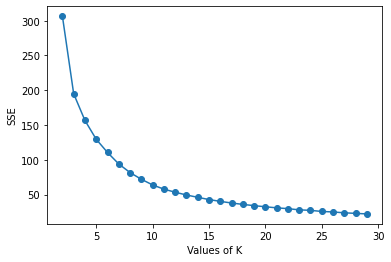

In [48]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 30)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [50]:

from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 15)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
df['cluster'] = kmeans.labels_

In [51]:
df

,ID,rec,frequ,value,recency_normalized,frequency_normalized,monetary_value_normalized,cluster
0,18287,42,70,1837,23,33,39,5
1,18283,3,756,2095,3,50,41,2
2,18282,7,12,178,6,9,7,3
3,18281,180,7,81,41,5,2,6
4,18280,277,10,181,46,7,7,6
...,...,...,...,...,...,...,...,...
4334,12350,310,17,334,48,13,15,1
4335,12349,18,73,1758,13,34,39,14
4336,12348,75,31,1797,31,21,39,7
4337,12347,2,182,4310,2,45,47,2


In [52]:
import plotly.graph_objects as go

PLOT = go.Figure()
    
PLOT.add_trace(go.Scatter3d(x = df['recency_normalized'],
                            y = df['frequency_normalized'],
                            z = df['monetary_value_normalized']
                           )
              )

In [55]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(df.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df[df.cluster == C]['recency_normalized'],
                                y = df[df.cluster == C]['frequency_normalized'],
                                z = df[df.cluster == C]['monetary_value_normalized'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'RFM Segment ' + str(C)))

In [56]:
PLOT.update_layout(width = 1000, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary Value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [57]:
df[df.cluster==6]

,ID,rec,frequ,value,recency_normalized,frequency_normalized,monetary_value_normalized,cluster
3,18281,180,7,81,41,5,2,6
4,18280,277,10,181,46,7,7,6
6,18277,58,8,110,27,6,3,6
12,18269,366,7,169,50,5,6,6
13,18268,134,1,26,37,1,1,6
...,...,...,...,...,...,...,...,...
4209,12509,284,7,177,47,5,7,6
4261,12441,366,11,174,50,8,7,6
4295,12401,303,5,84,48,3,2,6
4324,12361,287,10,190,47,7,7,6


In [58]:
cluster_energy=df.groupby(by='cluster').sum('recency')

In [59]:
cluster_energy['strength']=cluster_energy['frequency_normalized']+cluster_energy['monetary_value_normalized']-cluster_energy['recency_normalized']

In [60]:
cluster_energy

,ID,rec,frequ,value,recency_normalized,frequency_normalized,monetary_value_normalized,strength
cluster,,,,,,,,
0,5458296,43029,12823,245874,12043,7834,8601,4392
1,5867363,74498,4869,93131,14931,3544,3806,-7581
2,8236650,2499,157945,4157473,2281,22259,22854,42832
3,3042803,5618,20751,111444,3431,6876,4051,7496
4,5027733,54020,7263,133611,12314,5127,5579,-1608
5,6353005,17366,41323,869908,9244,14350,15279,20385
6,5730291,80202,2193,43747,15238,1541,1361,-12336
7,1780583,8530,1610,353579,3196,1151,3956,1911
8,2799575,32921,6409,36160,6699,3876,1406,-1417


In [61]:
cluster_energy.sort_values(['strength'], ascending=[False], inplace=True)

In [62]:
cluster_energy.sort_values('strength',ascending=False,inplace=True)

In [63]:
cluster_energy

,ID,rec,frequ,value,recency_normalized,frequency_normalized,monetary_value_normalized,strength
cluster,,,,,,,,
2,8236650,2499,157945,4157473,2281,22259,22854,42832
14,6905365,8788,76858,1618654,6177,17601,17683,29107
5,6353005,17366,41323,869908,9244,14350,15279,20385
12,6812179,36214,28498,554454,13020,12765,13653,13398
11,2236260,1159,22377,115188,958,5573,3663,8278
3,3042803,5618,20751,111444,3431,6876,4051,7496
0,5458296,43029,12823,245874,12043,7834,8601,4392
9,1426402,1005,2204,436063,767,1450,3327,4010
13,2771633,14721,11863,62992,4967,5245,2527,2805
